# Liner Regression with mpg dataset

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# imoort train test split
from sklearn.model_selection import train_test_split

# Note, seaborn is not available in Jupyter Lite, use Collab or a local environment
import seaborn as sns # we use this library to load the dataset

## Pandas References

You can use `pandas_summary` file throughout this notebook to get a quick reference to pandas functions. The file is located in the same directory as this notebook.|


## Load data

In [2]:
# Load the 'mpg' dataset using seaborn library into a Pandas DataFrame
df = sns.load_dataset('mpg')

MPG dataset can be viewed online at  
https://github.com/mwaskom/seaborn-data/blob/master/mpg.csv

#### What is the type of the dateset? (type(df))

In [3]:
#your code here
print(type(df))

<class 'pandas.core.frame.DataFrame'>


`DataFrame` is a fundamental Pandas structure. It is essentially a table with rows and columns. You can think of it as a spreadsheet or SQL table. DataFrames are particularly useful because they can handle a large amount of data and are very fast.

#### Show the first 5 rows of the dataset

In [4]:
#your code here
print(df.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


## Data Preprocessing


Since most cars weight around 1-2 tons, it's convenient to convert the weight to metric tons here

$
\text{tons} = \frac{\text{pounds}}{2204.62}
$

Converting gas usage to Litres per 100km is important to get a better linear fit

$
\text{lphk} = \frac{235.214}{\text{MPG}}
$


#### Change the weight column to metric tons and add one column for `lphk`

In [5]:
# your code here
df["m"] = df["weight"] / 2204.62

df["lphk"] = 235.214 / df["mpg"]

print(df)



      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name         m       lphk  
0            70     usa  chevrolet chevelle malibu  1.589390 

### Handing missing data

In [6]:
# We will use these 4 columns as potential explanatory variables for fuel consumption (lphk)
fit_cols = ['m', 'cylinders', 'displacement', 'horsepower'] # Set tons to new m column rather than weight itself

# Discard several rows with missing values in the columns we want to use for fitting
df = df.dropna(subset=fit_cols)

#### Use df.head() again to see the changes (unit conversion and missing data)

In [7]:
# your code here
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,m,lphk
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,1.589390,13.067444
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,1.675119,15.680933
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,1.558545,13.067444
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,1.557184,14.700875
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,1.564442,13.836118


#### Take a look at df.shape, how many cars are in this dataset, and how many features per car?

In [8]:
# your code here
print(df.shape)
# There are 392 cars, with 10 features (1 target)

(392, 11)


### Important Notes

You can access columns in both notations `df['weight']` or `df.weight`.  
But if you want to define a new column, it must be `df['new_col_name']`

## Data Visualization

#### Plot a histogram of car weights

#### pass `edgecolor='black'` to buitify the histogram

In [9]:
bins = np.arange(0.5, 2.5, 0.1)
print(bins)

[0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2
 2.3 2.4]


<Axes: >

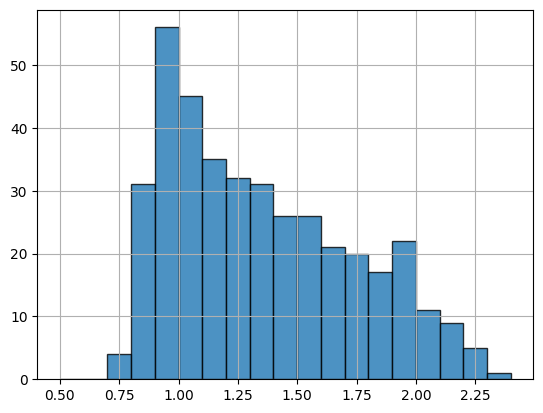

In [10]:
#your code here
df.m.hist(bins=bins, edgecolor="black", alpha=0.8)

#### Plot a histogram of the `model_year`

#### Pandas has a convenience function to plot histograms, but it uses the same matplotlib library. You can call the hist() on the column of a DataFrame. Try it.

<Axes: >

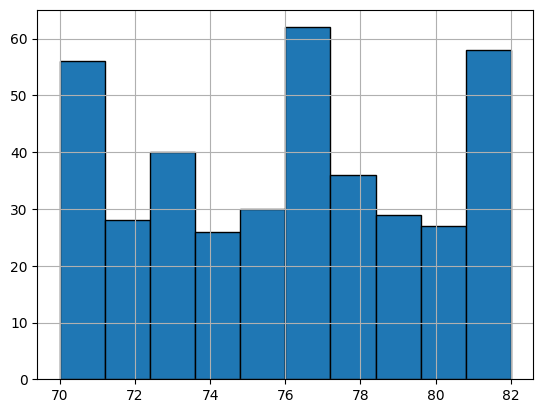

In [11]:
# your code here
df["model_year"].hist(edgecolor="black")

#### You can also call `aggregate` functions on a DataFrame column, like `min`, `max`, `mean`, `median`, etc. Try it.

#### Compute the average and the median weight

In [12]:
#your code here
min_weight = df["m"].min()
print("Minimum weight (tons):", min_weight)
max_weight = df["m"].max()
print("Maximum weight (tons):", max_weight)
mean_weight = df["m"].mean()
print("Mean weight (tons):", mean_weight)
median_weight = df["m"].median()
print("Median weight (tons):", median_weight)

Minimum weight (tons): 0.7316453629196868
Maximum weight (tons): 2.3314675544991883
Mean weight (tons): 1.3506110729619931
Median weight (tons): 1.271647721602816


If you sum all elements of a boolean array, False is treated as 0 and True as 1. Therefore `bool_array.sum()` is the number of True elements in the array. For example `(df.weight > 2).sum()` is the number of models that weight above 2 tons.

#### Find the number of cars that weight more than 2 tons

In [13]:
# your code here
print((df.m > 2).sum())

26


#### Find how many cars there are for each number of cylinders

In [14]:
#your code here
df.groupby("cylinders").size()

cylinders
3      4
4    199
5      3
6     83
8    103
dtype: int64

#### Find what are the car models with unusual number of cylinders (3 or 5)

In [15]:
# your code here
cars_3cyl = (df[df.cylinders == 3])
print(cars_3cyl)

cars_5cyl = (df[df.cylinders == 5])
print(cars_5cyl)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
71   19.0          3          70.0        97.0    2330          13.5   
111  18.0          3          70.0        90.0    2124          13.5   
243  21.5          3          80.0       110.0    2720          13.5   
334  23.7          3          70.0       100.0    2420          12.5   

     model_year origin             name         m       lphk  
71           72  japan  mazda rx2 coupe  1.056871  12.379684  
111          73  japan        maxda rx3  0.963431  13.067444  
243          77  japan       mazda rx-4  1.233773  10.940186  
334          80  japan    mazda rx-7 gs  1.097695   9.924641  
      mpg  cylinders  displacement  horsepower  weight  acceleration  \
274  20.3          5         131.0       103.0    2830          15.9   
297  25.4          5         183.0        77.0    3530          20.1   
327  36.4          5         121.0        67.0    2950          19.9   

     model_year  origin            

#### Use `df.describe()` to explore the dataset. What years does it cover? What are the extremes of car weight?

In [16]:
# your code here
df.describe()
# Covers from 1970 - 1982
# Min weight of ~0.73 tons, max of ~2.33 tons 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,m,lphk
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.350611,11.248505
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.385283,3.913829
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.731645,5.047511
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.009358,8.110828
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.271648,10.340326
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,1.639625,13.836118
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,2.331468,26.134889


#### Find the lightest and heaviest cars, what make and model are they?

In [17]:
# your code here
m1 = df.m.min()
lightest_car = df[df.m == m1]
print(lightest_car)

m2 = df.m.max()
heaviest_car = df[df.m == m2]
print(heaviest_car)

     mpg  cylinders  displacement  horsepower  weight  acceleration  \
54  35.0          4          72.0        69.0    1613          18.0   

    model_year origin         name         m    lphk  
54          71  japan  datsun 1200  0.731645  6.7204  
     mpg  cylinders  displacement  horsepower  weight  acceleration  \
44  13.0          8         400.0       175.0    5140          12.0   

    model_year origin                 name         m       lphk  
44          71    usa  pontiac safari (sw)  2.331468  18.093385  


In [18]:
# Can sort dataframe as well to find min and max (first and last)
df_sort_by_m = df.sort_values("m")
print(df_sort_by_m)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
54   35.0          4          72.0        69.0    1613          18.0   
144  31.0          4          76.0        52.0    1649          16.5   
343  39.1          4          79.0        58.0    1755          16.9   
345  35.1          4          81.0        60.0    1760          16.1   
53   31.0          4          71.0        65.0    1773          19.0   
..    ...        ...           ...         ...     ...           ...   
95   12.0          8         455.0       225.0    4951          11.0   
90   12.0          8         429.0       198.0    4952          11.5   
42   12.0          8         383.0       180.0    4955          11.5   
103  11.0          8         400.0       150.0    4997          14.0   
44   13.0          8         400.0       175.0    5140          12.0   

     model_year origin                      name         m       lphk  
54           71  japan               datsun 1200  0.731645   6.

#### Find the most fuel efficient car (minimum lphk)

In [19]:
#your code here
min_lphk = df.lphk.min()
fuel_efficient_car = df[df.lphk == min_lphk]
print(fuel_efficient_car)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
322  46.6          4          86.0        65.0    2110          17.9   

     model_year origin       name         m      lphk  
322          80  japan  mazda glc  0.957081  5.047511  


#### For each of the columns in `fit_cols` plot `lphk` as a function of that column (`lphk`  on the `y` axis). Check if any linear relationship is clearly visible

####  pass `alpha=0.5` to plt.scatter to make the points semi-transparent

<Figure size 640x480 with 0 Axes>

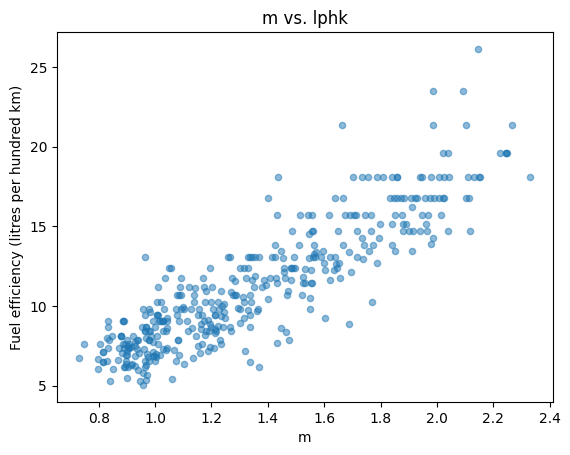

<Figure size 640x480 with 0 Axes>

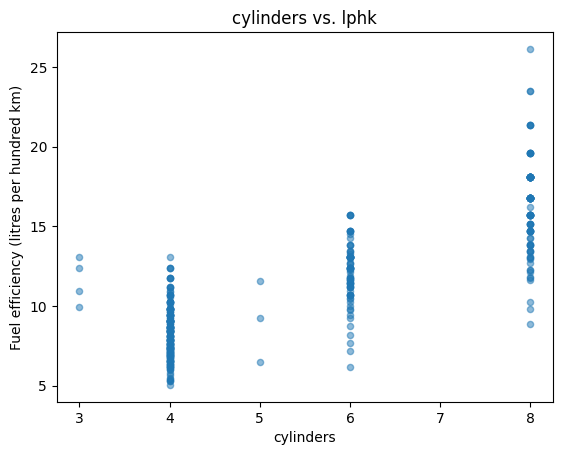

<Figure size 640x480 with 0 Axes>

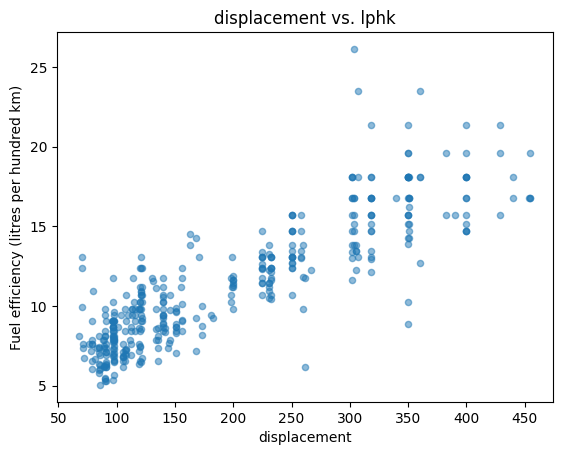

<Figure size 640x480 with 0 Axes>

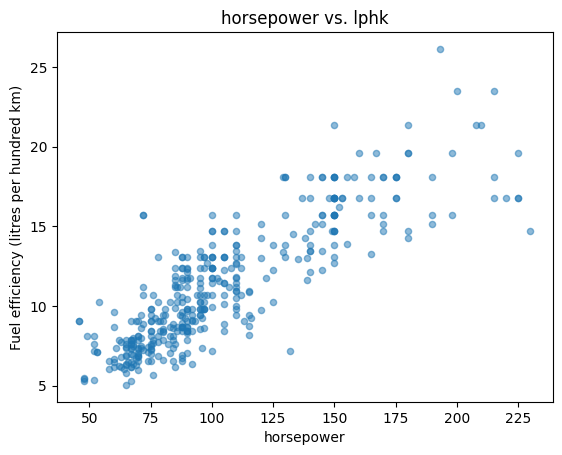

In [20]:
for col in fit_cols:
    plt.figure()
    df.plot(col, "lphk", kind="scatter", alpha=0.5)
    plt.ylabel("Fuel efficiency (litres per hundred km)")
    plt.title(col + " vs. lphk")

## Linear Fit using 1 variable - weight

#### OBJECTIVE

- Fit a line to the (training) data using the `weight` column as the independent variable and `lphk` as the dependent variable

- predict the `lphk` for test data

#### Split the data into training and testing sets (`random_state=123`)


In [ ]:
X = df['m'] # weight in tons is in "m" column (created new col rather than updating existing "weight" col) 
y = df['lphk']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

#### Plot training data and testing data on the same scatter plot

Text(0, 0.5, 'Litres per Hundred KM')

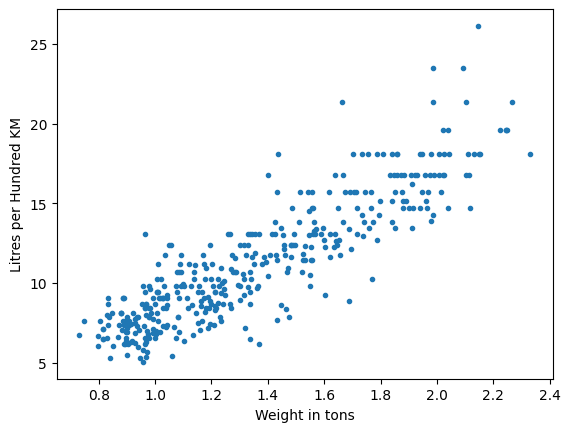

In [24]:
#your code here
plt.figure()
plt.plot(X, y, ".")
plt.xlabel("Weight in tons")
plt.ylabel("Litres per Hundred KM")

#### To fit a line, we need to find the slope and intercept of a line.

![linear equation](https://www.katesmathlessons.com/uploads/1/6/1/0/1610286/2964252_orig.png)
![linear graph](https://www.katesmathlessons.com/uploads/1/6/1/0/1610286/1163738_orig.png)

#### First let's run a fit using np.polyfit to get the line slope and intercept

In [25]:
a, b = np.polyfit(X_train, y_train, 1)
# a is slope, b is intercept
a, b 

(np.float64(8.993323485031352), np.float64(-0.9132759011979972))

#### Plot the training data and the line 

#### you need to draw a line using the slope and intercept you found -  the range of x values should be the same as the range of the training data [0.75 - 2.5]

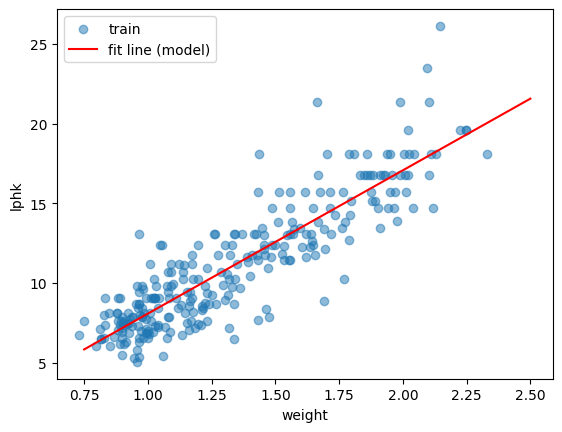

In [33]:
x = np.linspace(0.75, 2.5, 100)
y = a*x + b

plt.scatter(X_train, y_train, label='train', alpha=0.5)
plt.plot (x, y, color='red', label='fit line (model)')
plt.xlabel('weight')
plt.ylabel('lphk')
plt.legend()

#### Using a and b, what will be the predicted consumption of a hypothetical car weighting 1.2 tons?

In [27]:
#your code here
print(a*1.2 + b) # y = mx + b, where m is slope, x is weight, b is intercept


9.878712280839625


#### Now predict the consumption for a sample car in test set for example X_test[0]

In [34]:
#your code here
print("Tons:", X_test[0])
y_predicted = a*X_test[0] + b
print("Predicted lphk:", y_predicted)

Tons: 1.5893895546624817
Predicted lphk: 13.380618507611622


#### Plot the fitted line (model) and show the X_test[0] and y_test[0] and y_predicted on the same plot

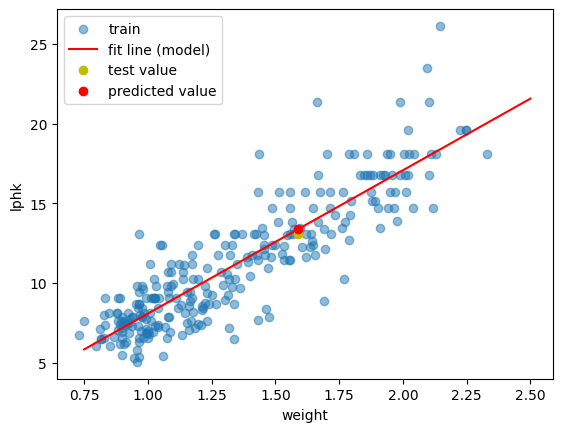

In [46]:
#your code here
x = np.linspace(0.75, 2.5, 100)
y = a*x + b

plt.scatter(X_train, y_train, label='train', alpha=0.5)
plt.plot (x, y, color='red', label='fit line (model)')
plt.plot([X_test[0]], [y_test[0]], "yo", label="test value")
plt.plot([X_test[0]], [y_predicted], "ro", label="predicted value")
plt.xlabel('weight')
plt.ylabel('lphk')
plt.legend()

#### Compute the error between the predicted value and the actual value

In [ ]:
#your code here
error = y_test[0] - y_predicted

print(error) # y_predicted is about 0.313 higher than the actual lphk value

-0.3131740631671782


#### (1) take 10  points from the test set 

#### (2) find the prediction for the 10 points 

#### (3) plot the true and predicted values besides the fitted line (model)

#### (4) compute the average error 

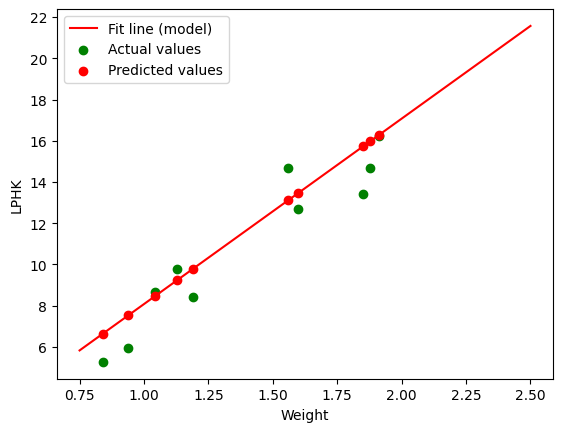

Subset average error: -0.6369798554890784
Subset MSE: 1.653384619513449


In [95]:
#your code here
x = np.linspace(0.75, 2.5, 100)
y = a*x + b

X_test_subset = X_test[1:11]
y_test_subset = y_test[1:11]

y_pred_subset = a * X_test_subset + b

plt.figure()

plt.plot(x, y, color='red', label="Fit line (model)")
plt.scatter(X_test_subset, y_test_subset, color='green', label='Actual values')
plt.scatter(X_test_subset, y_pred_subset, color='red', label='Predicted values')

plt.xlabel('Weight')
plt.ylabel('LPHK')
plt.legend()
plt.show()

error_subset = y_test_subset - y_pred_subset
mse_subset = ((y_test_subset - y_pred_subset)**2).mean()
print("Subset average error:", error.mean())
print("Subset MSE:", mse_subset)

#### Numerical estimate of how good this fit is
 - One common measure for the quality of a linear fit is the mean square error (MSE)
 - Assume that $y_i$ is the real value from data and $\hat{y}_i$ is the predicted value found as $\hat{y}_i = ax_i + b$
 - Taking the differences between the real and predicted values, then squaring them as $(y_i - \hat{y}_i)^2$ and then averaging gives the MSE
 
$MSE = \frac{1}{N} \sum{(y_i - \hat{y}_i)^2}$

#### Find the MSE for this fit and name it `y_pred1`

In [61]:
# your code here
y_pred1 = a * X_test + b
y_pred1 = ((y_test - y_pred1)**2).mean()
print("MSE:", y_pred1)

MSE: 3.107035576727724


## Same fit using sklearn.linear_models.LinearRegression
The 4 steps of model use in sklearn:
 1. Import (the Python class for the model you want to use)
 2. Instantiate (the class to create an object)
 3. Fit
 4. Predict
 
Just run the steps below, no need to modify this code

#### 1. Import

In [50]:
from sklearn.linear_model import LinearRegression

#### 2. Instantiate

In [51]:
model = LinearRegression()

#### 3. Fit

#### fit() expects a 2D data structure: `2D numpy array` or a `pd.DataFrame` for X

#### Printing `X_train` and also `type(X_train)`

In [52]:
print(type(X_train))
print(X_train)

<class 'pandas.core.series.Series'>
5      1.969047
237    0.930319
335    1.133982
19     0.832343
29     0.966153
         ...   
232    1.966325
99     1.335831
324    0.957081
388    1.172538
370    1.168002
Name: m, Length: 274, dtype: float64


#### As you can see the type of X_train, X_test are `Series`.  

#### `Series` and `DataFrame` are two main data structures in pandas. 

#### `Series` is 1D, 

#### and `DataFrame` is a multi-dimensional table made up of a collection of Series.

#### Because sklearn model.fit() function does not accept Pandas Series as the X argument, we need to convert `X_train` and `X_test` `Series` to either a Numpy array or a DataFrame

In [53]:
X_train_df = pd.DataFrame(X_train)
X_train_df

,m
5,1.969047
237,0.930319
335,1.133982
19,0.832343
29,0.966153
...,...
232,1.966325
99,1.335831
324,0.957081
388,1.172538


you can see the difference in the form of printing output for `Series` and `DataFrame` types. 

#### Having X_train as a data frame, fit the model

In [54]:
#solution
model.fit(X_train_df, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### 4. Predict

#### predict() takes a 2D array or pd.DataFrame with the same as used in fit() 

#### Change the `X_test` type from `Series` to `DataFrame` and then predict the values for the test set

### name your prediction `y_pred_test`

In [55]:
# your code here
X_test_df = pd.DataFrame(X_test)

y_pred_test = model.predict(X_test_df)
print(y_pred_test)


[15.64871362  7.53089117 15.97913755  9.24012113  9.79490698 13.1154635
  8.46913196 13.46628397 15.73029978  6.63344346 16.28100633 11.89575048
 14.79205899  7.55128771 15.62831709 11.25937847  8.46913196 19.471025
 15.80372732 13.80894582 11.4837404   8.14278734  9.77451044  6.26630577
  7.14335693 14.67375907  9.69292429  7.83275995 11.10028547  6.56817454
 13.13993935  9.71332083 12.49948803 11.05133377 11.38583701 10.14572745
  7.7552531  10.50878584  9.46856236 16.93777488 14.87364515 12.79319819
  8.9096972  13.48668051  9.88873106 11.67546786 10.20283776  9.83570006
  8.8566662  12.40158464  9.98663445  7.44930502 16.72973018 13.05835319
 12.99716358 16.95409211 18.44711875  8.14278734 10.643403    7.20454655
 16.30140287 19.29969407  8.1754218  10.28442391 14.71047284  6.61304693
  7.85723579 11.18187162 10.63116507 11.37359909  9.98255514  6.31933677
  7.9143461  16.88474388 10.4883893   9.0157592  11.10028547 15.7384584
 12.2751261  16.84803011  7.14335693  9.93768275  8.155

#### Take a look at `model.coef_` and `model.intercept_` and compare them to a and b from before

In [56]:
model.coef_, model.intercept_

(array([8.99332349]), np.float64(-0.9132759011979985))

In [57]:
# recalling the value of a and b
a, b

(np.float64(8.993323485031352), np.float64(-0.9132759011979972))

#### sklearn comes with a variety of metrics used to estimate quality of models, including the MSE. 

#### Run the cell below and verify that the result is the same as the one you got before

In [58]:
from sklearn import metrics
test_error = metrics.mean_squared_error(y_test, y_pred_test)
test_error

3.107035576727724

#### predict the values for the TRAIN set

#### name your prediction `y_pred_train`

#### Find the MSE for train set

In [59]:
y_pred_train = model.predict(X_train_df)
print(y_pred_train)

train_error = metrics.mean_squared_error(y_train, y_pred_train)
train_error

[16.79499911  7.45338432  9.28499351  6.57225385  7.77564964  8.0163288
  8.67309735 10.32521699  8.84034897 11.67138855 13.2215255  14.96338992
 19.28337684  7.94290126  7.10256386 12.55659834  9.08510743 15.71806186
  5.66664752  8.77508004  8.32635619 10.87592354  5.8135026  17.29675396
  7.32284648  8.1223908   7.77564964  7.83683925  7.89802887 13.15625658
 17.19885058 14.28214552 14.3229386   7.25757755  7.10256386 13.08690835
  8.42018027  7.88987026 17.43545043 10.18244122  8.18358041  7.77564964
 18.07182244 16.52168549  8.88114204  7.04137424  9.30946936  8.7546835
  7.18415001 11.1696337  12.01405041 10.9575097  19.28745615  8.8566662
  9.38697621  7.42890848  9.55014852  6.89859847  9.85201729 10.97382693
  6.40908154 16.67669918  7.20454655 16.53800272 11.33688532 13.44588743
 16.07704094 17.26819881  6.53146077  9.45632444  7.00058116  7.68590487
 13.79262859 15.97505825  6.53146077  7.74709448 16.25653048 12.66673965
  7.18415001  8.19989765 12.11195379  6.42947808  7.75

3.3985838436465916

## Multiple explanatory variables
Regression with multiple explanatory variables
is no different from the simple case with one variable we just saw, the prediction for 3 explanatory variables looks like this:

$ \hat{y} = a_1 x_1 + a_2 x_2 + a_3 x_3 + b $

The coefficients in `linreg.coef_` will be `[a1, a2, a3]` after the fit()

#### Using the X with all columns from `fit_cols` copy and repeat the fit and predict steps above to obtain a new fit
 - Import is no longer needed since the LinearRegression class is already imported
 - It's up to you whether to instantiate a new object or reuse the old one. It's considered to be a good practice to create a new one in such cases, since it reduced the risk of confusion, but it's not a strict rule.

In [62]:
# Use X with all columns in fit_cols
X = df[fit_cols]
y = df['lphk']
X.head()

,m,cylinders,displacement,horsepower
0,1.589390,8,307.0,130.0
1,1.675119,8,350.0,165.0
2,1.558545,8,318.0,150.0
3,1.557184,8,304.0,150.0
4,1.564442,8,302.0,140.0


In [63]:
print(X.shape)
print(y.shape)

(392, 4)
(392,)


In [64]:
model_multiple = LinearRegression()
model_multiple.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [65]:
model_multiple.coef_, model_multiple.intercept_

(array([ 5.20426231e+00,  3.34412018e-01, -1.89027559e-03,  3.39998567e-02]),
 np.float64(-0.7947638154405468))

#### Take a look at the coefficients (they come in the same order as columns in X)

In [66]:
list(zip(X.columns, model_multiple.coef_))

[('m', np.float64(5.204262313611998)),
 ('cylinders', np.float64(0.3344120175657568)),
 ('displacement', np.float64(-0.0018902755888942446)),
 ('horsepower', np.float64(0.03399985672476914))]

#### Use `metrics.mean_squared_error()` to compute the MSE again. Does it mean we got a better or worse fit?

In [ ]:
mse2 = metrics.mean_squared_error(y, model_multiple.predict(X))
mse2
# Lower error means a more accurate fit

2.7834576195587086

#### Compare this erro with the train_error + test_error in the previous section

In [69]:
# your code here
print("Train error:", train_error)
print("Test error:", train_error)
print("New error:", mse2)

Train error: 3.3985838436465916
Test error: 3.3985838436465916
New error: 2.7834576195587086


#### Try excluding each of the 4 columns from the X (one at a time), run the fit and compute MSE each time. Which of the column results in the largest degradation in quality of fit when removed?
 - This can be interpreted as an estimate of importance of that column in explaining the dependant variable

In [73]:
# your code here

for col in fit_cols:
    print("Excluding:", col)
    cols = [c for c in fit_cols if c != col]
    X = df[cols]
    y = df['lphk']

    model_multiple = LinearRegression()
    model_multiple.fit(X, y)

    mse_removed = metrics.mean_squared_error(y, model_multiple.predict(X))
    print(f"Error (no {col}): ", mse_removed)

Excluding: m
Error (no m):  3.28152664725726
Excluding: cylinders
Error (no cylinders):  2.8140611578161803
Excluding: displacement
Error (no displacement):  2.7854780279964664
Excluding: horsepower
Error (no horsepower):  3.103813766002495


#### Which of the 4 columns is least valuable for the fit?

Based on the calculated error values, mass is the least valuable (as it has the highest error value)